In [1]:
include("prepare_data_Sioux_simp.jl");
include("extract_data.jl");
include("tap_MSA_Sioux_simp.jl");

## Solve an inverse tarffic problem over polynomials of degree at most d

## Optionally use a regularizer from the poly kernel

In [2]:
tapFlowVecDict = Dict{Int64, Array{Float64, 1}}();
tapFlowDicDict = Dict{Int64, Dict{(Int64,Int64),Float64}}();

fcoeffs = [1, 0, 0, 0, .15]
# fcoeffs = [1, .2, .5, .8, .15]

tapFlowDicDict[0], tapFlowVecDict[0] = tapMSA(demandsDict[0], fcoeffs);
tapFlowDicDict[1], tapFlowVecDict[1] = tapMSA(demandsDict[1], fcoeffs);

In [3]:
arcsDict = Dict{Int64, Dict{(Int, Int), Arc}}()

# get arcs data corresponding to ground truth demands and flows
arcsDict[0] = observFlow("../data_original/SiouxFalls_net_simp.txt", tapFlowDicDict[0])

# get arcs data corresponding to initial demands and flows
arcsDict[1] = observFlow("../data_original/SiouxFalls_net_simp.txt", tapFlowDicDict[1])

Dict{(Int64,Int64),Arc} with 30 entries:
  (11,12) => Arc(11,12,4908.82673,6.0,4284.626868160393)
  (4,3)   => Arc(4,3,17110.52372,4.0,6938.213597889815)
  (2,6)   => Arc(2,6,4958.180928,5.0,3596.1345751797903)
  (11,4)  => Arc(11,4,4908.82673,6.0,4251.562641497122)
  (5,6)   => Arc(5,6,4947.995469,4.0,7971.018331642179)
  (4,11)  => Arc(4,11,4908.82673,6.0,4291.979741745609)
  (8,6)   => Arc(8,6,4898.587646,2.0,7298.068407052554)
  (5,4)   => Arc(5,4,17782.7941,2.0,10703.236309343703)
  (10,11) => Arc(10,11,10000.0,5.0,7997.0469707859575)
  (2,1)   => Arc(2,1,25900.20064,6.0,2221.7010290067205)
  (8,9)   => Arc(8,9,5050.193156,10.0,4933.570601153778)
  (12,3)  => Arc(12,3,23403.47319,4.0,3042.0582098571854)
  (11,10) => Arc(11,10,10000.0,5.0,8200.878398486044)
  (3,1)   => Arc(3,1,23403.47319,4.0,3704.754586373114)
  (5,9)   => Arc(5,9,10000.0,5.0,8169.310281651208)
  (6,2)   => Arc(6,2,4958.180928,5.0,3376.8439800331494)
  (6,8)   => Arc(6,8,4898.587646,2.0,7412.101780072026)
  (4,5)

In [4]:
include("inverseVI.jl");

In [8]:
coeffs_dict = Dict{(Int64,Float64,Float64,Int64),Array{Float64,1}}()
objInvVI = Dict{Int64, Float64}()

deg = 6
c = 3.41
lam = 1.
iterN = 1

coeffs_dict[(deg, c, lam, iterN)], objInvVI[iterN] = train(lam, deg, c, demandsDict[1], arcsDict[0])

([1.0,0.00930161,0.0346947,-0.139536,0.0898315,0.0527054,0.00656301],0.00673015770593588)

### Visualize the estimated cost function

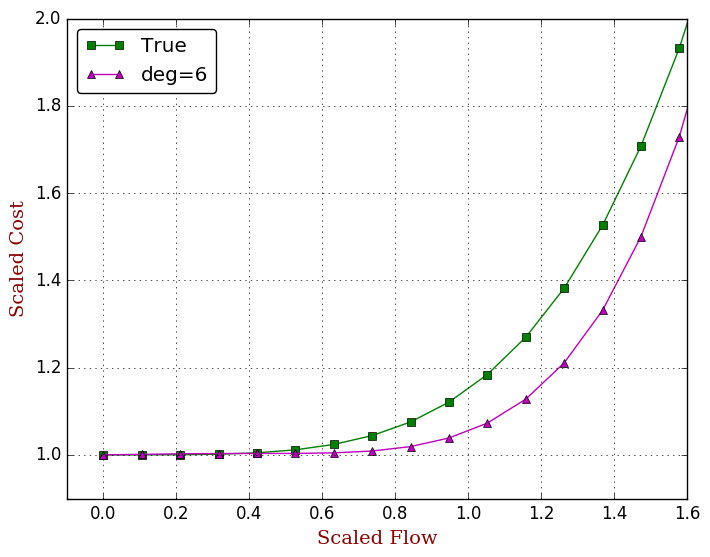

In [9]:
using PyPlot

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(6, 3.41, 1., 1)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

plot(xs, zs_true, "s-g", label="True")

plot(xs, zs, "^-m", label="deg=6")
legend(loc="upper left",fancybox="true") 

grid("on")
xlim(-0.1, 1.6);
ylim(0.9, 2.0);

font1 = ["family"=>"serif","color"=>"darkred","weight"=>"normal","size"=>14]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("fitting_Sioux_simp.pdf")